# 01 Regression

## Info

:**In this assignment the objective is create a model using linear regression to predict the houses price**

The data contains the following columns:


*   'crim': per capita crime rate by town.
*   'zn': proportion of residential land zoned for lots over 25,000 sq.ft.

*   'indus': proportion of non-retail business acres per town.

*   'chas':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

*   'nox': nitrogen oxides concentration (parts per 10 million).

*   'rm': average number of rooms per dwelling.

*   'age': proportion of owner-occupied units built prior to 1940.
*   'dis': weighted mean of distances to five Boston employment centres.


*   'rad': index of accessibility to radial highways.


*   'tax': full-value property-tax rate per $10,000.


*   'ptratio': pupil-teacher ratio by town


*   'black': 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

*   'lstat': lower status of the population (percent).
*   'medv': median value of owner-occupied homes in $$1000s


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2 Load Dataset

In [ ]:
boston = pd.read_csv('/content/drive/MyDrive/Machine Learning /datasets/01_BostonHousing.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# capitalize columns
# change in var = [ var.operation() followed by loop]
boston.columns = [col.upper() for col in boston.columns]
boston


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
# Drop unnecessary if present..here not present
# boston_data.drop('ID', axis=1, inplace=True)

In [ ]:
# check for missing values
df = boston
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
# rename med to prices
boston.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'prices']
# boston = boston.rename(columns={'MEDV': 'prices'})
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prices
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 3 Preprocessing

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  prices   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Check for missing values if any

In [ ]:

boston.isnull().sum() # to check for missing (null or NaN)
#is null marks true / false of any value is null/not....sum calculates total

# No null values are present in the dataset

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


### Check zero values
we need to check the zero values in the dataset to avoid the irregularity.

In [ ]:
x = boston[['crim','zn','indus','chas', 'nox', 'rm', 'age', 'dis', 'rad','tax','ptratio','black','lstat','prices']]==0
x = x.sum()
print(x)


crim         0
zn         372
indus        0
chas       471
nox          0
rm           0
age          0
dis          0
rad          0
tax          0
ptratio      0
black        0
lstat        0
prices       0
dtype: int64


:It is observed from above description that 'zn' and 'chas' has too many zero values, it will not be proper if we replace these many zeros with some value so we need to remove zn and chas

In [ ]:
boston = boston.drop(columns=['zn', 'chas'])
boston

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prices
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 4 Standardization
using preprocessing module in sklearn library. we perform some standardiztion of dataset. Standardization is the process of converting the data distribution into the standard normal distribution In this process we subtract mean from each value and divide it with the standard deviation

In [ ]:
from sklearn import preprocessing

In [ ]:
boston

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prices
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
std = preprocessing.StandardScaler()

In [ ]:
# seperate the prices column
# store the remaining 11 in temporary as bos
y = boston['prices']
bos = boston.drop(['prices'], axis=1) #or
# bos = boston.drop(columns =['prices'])

#after standard scaling...df is converted to 2d array..so reconvert it to df


bos = std.fit_transform(bos)
print(bos[0])

[-0.41978194 -1.2879095  -0.14421743  0.41367189 -0.12001342  0.1402136
 -0.98284286 -0.66660821 -1.45900038  0.44105193 -1.0755623 ]


In [ ]:
boston = pd.DataFrame(bos)
boston

,0,1,2,3,4,5,6,7,8,9,10
0,-0.419782,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [ ]:
# Renmae number columns after standardize
boston.columns = ['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']
boston

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.419782,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [ ]:
# again add unstandardized prices col
boston['prices'] = y
boston
#If you normalized y, you’d have to inverse the scaling after prediction to get meaningful results. so not done

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prices
0,-0.419782,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0


## 5 Data Analysis

This plots aims to visually explore the relationship between each feature and the target variable ('prices') using scatter plots.

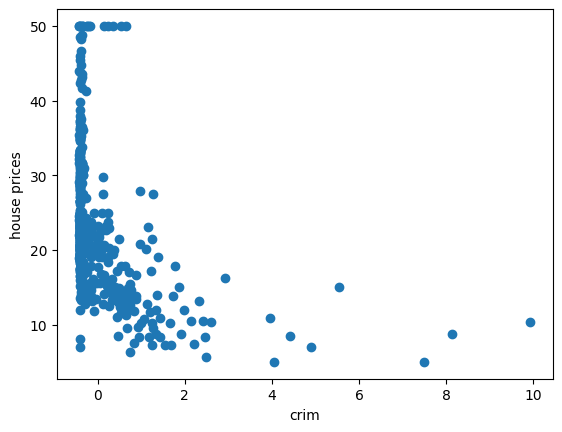

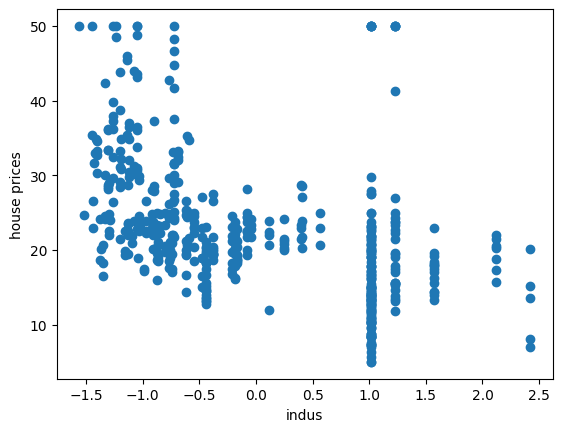

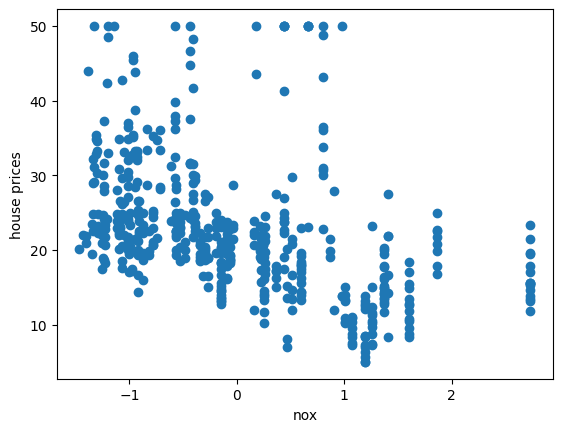

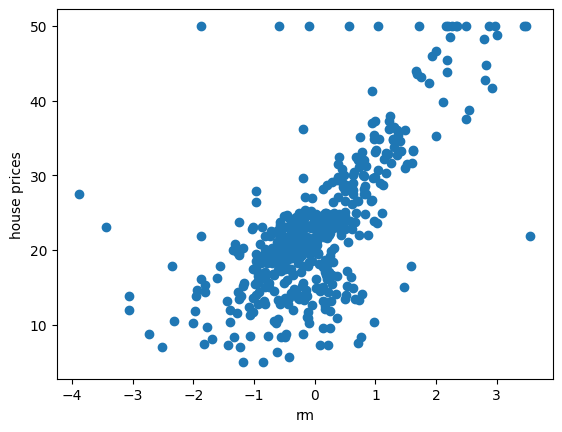

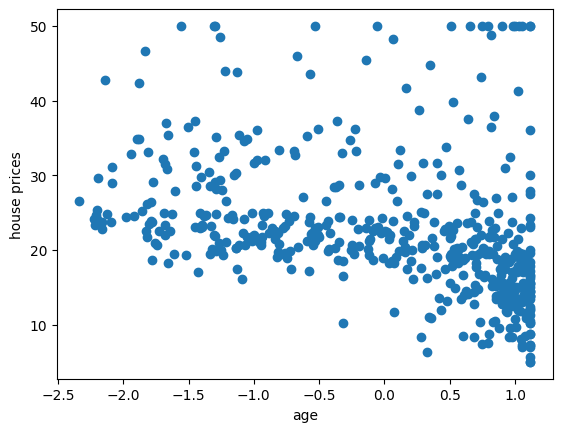

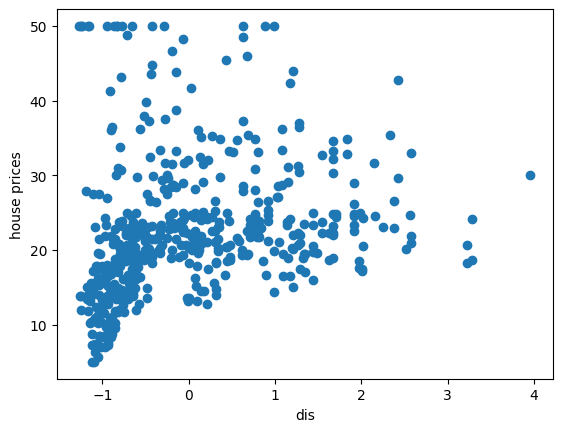

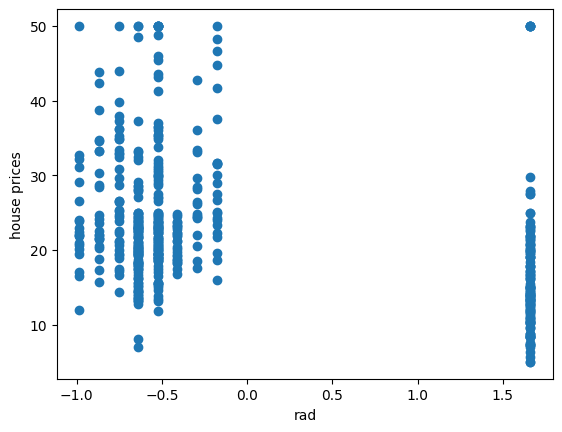

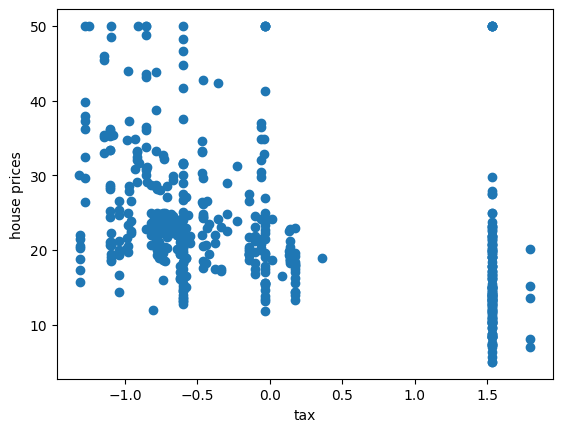

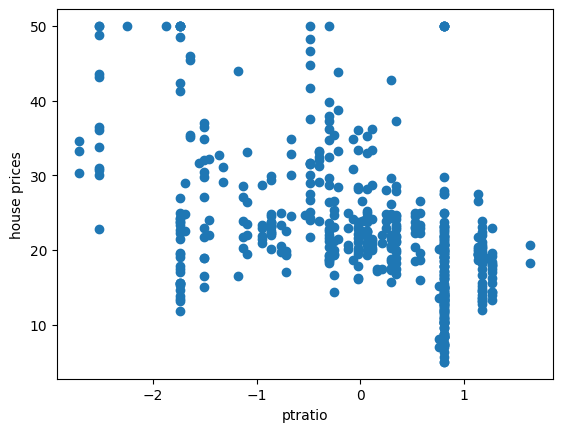

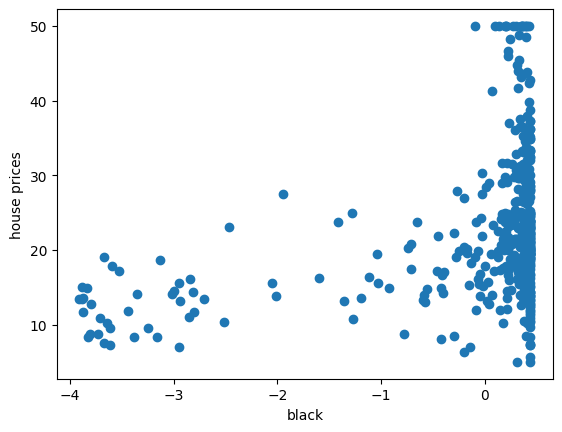

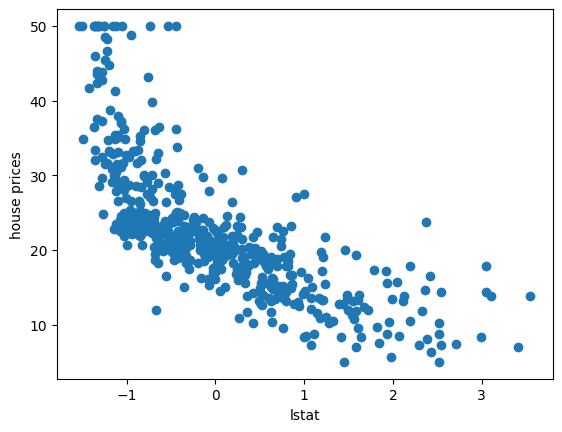

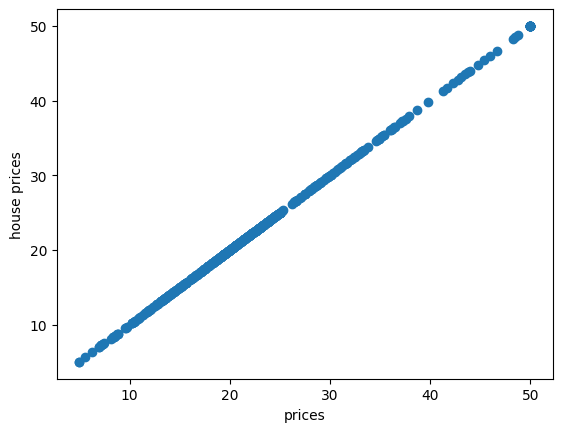

In [ ]:
for i in boston.columns: #index i holds col name
  plt.scatter(boston[i], boston['prices'])
  plt.xlabel(i)
  plt.ylabel('house prices')
  plt.show()

# this gives relationship of features w.r.t target prices
# eg. see first scatter plot..as we see more crime rates..means less is the house prices

By examining these plots, you can gain insights into which features might be most influential in predicting house prices. For instance, a clear upward or downward trend in a scatter plot suggests a strong correlation between that feature and the target variable prices.

From the above plots we can conclude that *nox*, *age*, and  *lstat* are the factors which constantly negatively relate with the target variable and *mm* is the variable which  has constant positive relation with the target variable. This variables have significance in building the model.

Relationship betn crime and prices of house in the city is is a nonlinear negative relationship. We can see that the area where crime is very less has very high prices of house and the area where crime increases are the area's with very low prices. Also it can be observed that there is very high concentration of data at low crime areas.

## 6 Training Linear Regression Model

In [ ]:
from sklearn import linear_model

**Define** X and Y

X: Varibles named as predictors, independent variables, features.
Y: Variable named as response or dependent variable

In [ ]:
Y = boston['prices']
X = boston.drop("prices", axis=1)
X = np.array(X) # convert df to array
X


array([[-0.41978194, -1.2879095 , -0.14421743, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.59338101, -0.74026221, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.59338101, -0.74026221, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658,  0.11573841,  0.15812412, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407,  0.11573841,  0.15812412, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016,  0.11573841,  0.15812412, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [ ]:
# X.reshape(1, -1)
#  The 1 indicates that we want one row in the reshaped array.
#  The -1 is a special value that tells NumPy to automatically calculate
#  the number of columns needed to maintain the total number of elements
#  in the array. It essentially flattens the array into a single row with all the features.

Lets split the data into two parts that is in training and testing parts
we will create these parts in ratio of 8:2

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=4) ## datset split
#If you don't set a random_state, every time you run the code, the data will be shuffled differently,
#  meaning you'll get different splits each time...thus it avoids reshuffling


In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)  ### training on dataset using LR 252 samples

LinearRegression()

In [ ]:
y_pred = regr.predict(x_test)###48+33=
y_pred

array([13.04380203, 26.58908082, 18.14354941, 14.98090149, 38.02742123,
       26.40928589, 29.28396233, 20.25200971, 19.7936239 , 20.53646139,
       27.71677796, 28.04966415, 18.76821564, 29.8653345 , 22.12528572,
       15.63835273, 22.43175326, 11.63037935, 11.04834003, 13.62235679,
        5.75625404, 17.93484404, 20.28471752, 22.3215678 , 18.18245262,
       20.12704635, 14.73797948, 13.69873015, 21.30061784, 17.03735989,
       14.62357332, 22.44646308, 34.70293527, 21.84774727, 16.91782996,
       20.42831955, 31.4421657 , 36.80041888, 23.72178782, 25.52496087,
       35.60277464, 33.28763509, 19.40088491, 31.36009775, 30.81586421,
       23.50285395, 39.21337432, 19.16954415, 19.94251002, 24.4781966 ,
       30.60606159, 27.02069004, 18.32526662, 29.98919845, 12.89692124,
       23.77400081, 24.49201466, 32.6406851 , 16.54452766, 32.34965725,
       15.37136266, 18.97201329, 31.6714289 , 15.75058163, 39.74102447,
       25.97325579, 28.91108926, 10.16883726, 19.81759178, 22.67

 `ypred` represents the predicted house prices based on the test data (`x_test`).

 The model, after being trained on the training data (`x_train`, `y_train`),
 uses the learned coefficients to make predictions on the unseen `x_test`

In [ ]:
regr.score(x_test, y_test) ### test accuracy

0.7221157909282524

This is the testing accuracy calculated as 72. something %

In [ ]:
regr.score(x_train, y_train) ##training accuracy of Model

0.7284850173701609

In [ ]:
from sklearn.metrics import r2_score

# R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
# R² = 1 → perfect fit
# R² = 0 → model does no better than mean
# R² < 0 → worse than predicting the mean
# Use R² to check overall goodness of fit.



R-squared: 0.7221157909282524


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 3.3017093097451857
MSE: 25.812448636118003
RMSE: 5.080595303320075


Root mean squared error in this case is 5.something

Text(0, 0.5, 'Predicted Y')

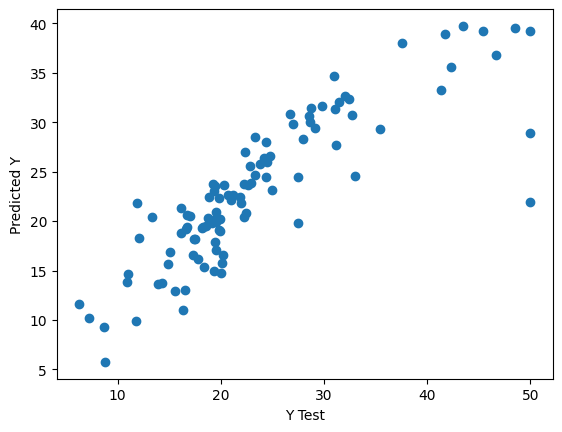

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

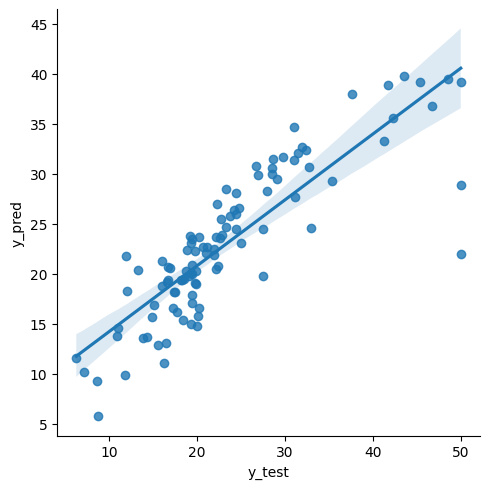

In [ ]:

df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

import seaborn as sns
sns.lmplot(x='y_test', y='y_pred', data=df)
plt.show()


<ipython-input-43-79bc4aeb7506>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,bins=50)


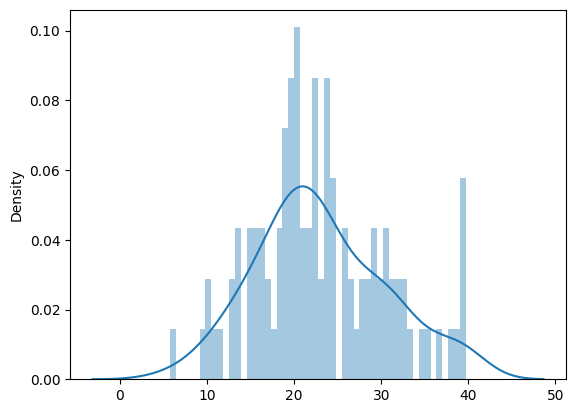

In [ ]:
import seaborn as sns
sns.distplot(y_pred,bins=50)
plt.show()

In [ ]:
# prompt: analyze above code and add last columns as predicted prices

# Assuming 'boston' DataFrame is already processed as in the provided code.
# Add the predicted prices as a new column to the DataFrame.

boston['predicted_prices'] = regr.predict(X)  # Predict for the entire dataset

boston


,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prices,predicted_prices
0,-0.419782,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0,30.127232
1,-0.417339,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6,25.658417
2,-0.417342,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7,31.421582
3,-0.416750,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4,29.705586
4,-0.412482,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2,29.146693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4,23.509722
502,-0.415249,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6,21.966003
503,-0.413447,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9,27.115928
504,-0.407764,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0,25.675000


## Conclusion
The model performance for the training set is 72.84% where as model performance for testing set is 72.22%.

The RMSE that is root mean squared error of the model is 5.08.


## Closing

Lets Finally create a file which contain all the independent as well as dependent variables and also the corresponding predicted values along with them.

In [ ]:
y_train_pred = regr.predict(x_train)
list1 = y_train_pred.tolist() + y_pred.tolist()

In [ ]:
output = boston
output['predicted_prices'] = list1
#regr.predict(X)
output.to_csv('/content/drive/MyDrive/Machine Learning /Outputs/01_LinearRegressionOutpt.csv')

In [ ]:
boston

### Whats it represent
Actual price (medv) = 24

Predicted price = 32

Model overpredicted by 8 ($8000)


This means the combination of feature values for this house made the model believe it was worth significantly more than it actually is.

Likely Causes Based on Features:
- 'rm' (rooms) – Maybe the house has a high number of rooms, and the model heavily weights this feature (which makes sense — more rooms → higher price).

- 'lstat' (lower status population %) – If this is low, the model thinks it’s a wealthy area → predicts high price.

- 'black' – This transformation (1000(Bk - 0.63)^2) could skew predictions if Bk is far from 0.63.

- 'nox', 'tax', 'ptratio' – Higher values usually push prices down, but if they are low, the model may inflate the prediction.